Visualizing the columns

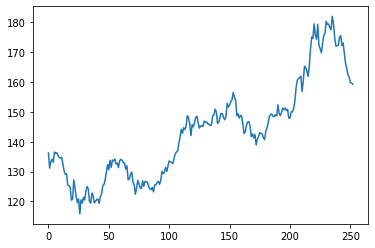

In [83]:
import matplotlib.pyplot as plt
df=pd.read_csv("datasets/stock_data.csv")
plt.plot(df['apple'])
plt.show()

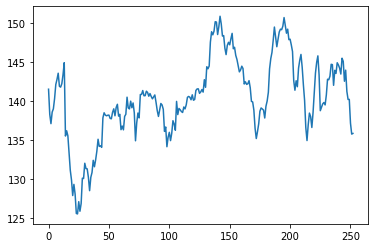

In [84]:
plt.plot(df['walmart'])
plt.show()

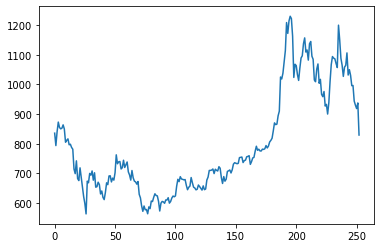

In [85]:
plt.plot(df['tesla'])
plt.show()

The ADF test to help us understand whether the time series is stationary or not.<br>
Null hypothesis: If failed to be rejected, it suggests the time series is not stationarity.<br>
Alternative hypothesis: The null hypothesis is rejected, it suggests the time series is stationary.

In [86]:
n_obs = 20
df_train, df_test = df[0:-n_obs], df[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('ADF Test: Apple time series')
adf_test(df_train['apple'])
print('ADF Test: Walmart time series')
adf_test(df_train['walmart'])
print('ADF Test: Tesla time series')
adf_test(df_train['tesla'])

ADF Test: Apple time series
ADF Statistics: 0.413486
p-value: 0.981992
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF Test: Walmart time series
ADF Statistics: -2.277958
p-value: 0.179175
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF Test: Tesla time series
ADF Statistics: -0.622218
p-value: 0.865882
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


The p-values are all well above the 0.05 alpha level, we cannot reject the null hypothesis. So the three time series are not stationary.

The KPSS test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root.<br>
Null hypothesis: The time series is stationary<br>
Alternative hypothesis: The time series is not stationary

In [70]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
        
print('KPSS Test: Apple time series')
kpss_test(df_train['apple'])
print('KPSS Test: Walmart time series')
kpss_test(df_train['walmart'])
print('KPSS Test: Tesla time series')
kpss_test(df_train['tesla'])

KPSS Test: Apple time series
KPSS Statistic: 1.2668820609490155
p-value: 0.01
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Walmart time series
KPSS Statistic: 0.7345842266772379
p-value: 0.010401433938432918
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Tesla time series
KPSS Statistic: 0.8977359529318497
p-value: 0.01
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The p-value are all less than 0.05 alpha level, therefore, we can reject the null hypothesis and derive that the three time series are not stationary.

We will transform the time series to be stationary by difference method.

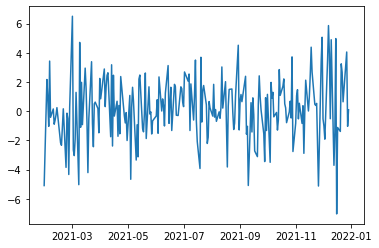

In [71]:
df_train_transformed = df_train.diff().dropna()
plt.plot(df_train_transformed['apple'])
plt.show()

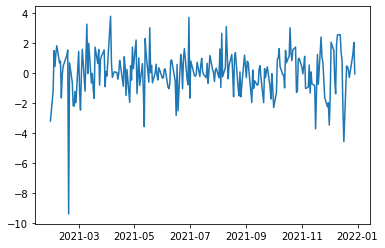

In [72]:
plt.plot(df_train_transformed['walmart'])
plt.show()

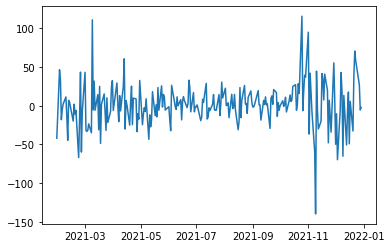

In [73]:
plt.plot(df_train_transformed['tesla'])
plt.show()

In [74]:
print('ADF Test: Apple time series transformed')
adf_test(df_train_transformed['apple'])
print('ADF Test: Walmart time series transformed')
adf_test(df_train_transformed['walmart'])
print('ADF Test: Tesla time series transformed')
adf_test(df_train_transformed['tesla'])

ADF Test: Apple time series transformed
ADF Statistics: -16.399792
p-value: 0.000000
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF Test: Walmart time series transformed
ADF Statistics: -14.092783
p-value: 0.000000
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF Test: Tesla time series transformed
ADF Statistics: -15.219981
p-value: 0.000000
Critical values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


In [75]:
print('KPSS Test: Apple time series transformed')
kpss_test(df_train_transformed['apple'])
print('KPSS Test: Walmart time series transformed')
kpss_test(df_train_transformed['walmart'])
print('KPSS Test: Tesla time series transformed')
kpss_test(df_train_transformed['tesla'])

KPSS Test: Apple time series transformed
KPSS Statistic: 0.3291055407541089
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Walmart time series transformed
KPSS Statistic: 0.052932014282440376
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Tesla time series transformed
KPSS Statistic: 0.2857563085189273
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method.

In [76]:
from statsmodels.tsa.api import VAR

model = VAR(df_train_transformed)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  8.72655663611985
BIC :  8.905383530172932
FPE :  6164.529052761526
HQIC:  8.79868374201267 

Lag Order = 2
AIC :  8.780918214296266
BIC :  9.094829803371862
FPE :  6509.218146911167
HQIC:  8.907543818961926 

Lag Order = 3
AIC :  8.785409255497568
BIC :  9.235241832382403
FPE :  6539.238420581717
HQIC:  8.966882884575986 

Lag Order = 4
AIC :  8.805394992611074
BIC :  9.391993587037492
FPE :  6672.610525963443
HQIC:  9.042069782419274 

Lag Order = 5
AIC :  8.812910133989158
BIC :  9.537128639888309
FPE :  6725.170616260141
HQIC:  9.105142882260495 

Lag Order = 6
AIC :  8.838101572167384
BIC :  9.700802877293581
FPE :  6900.126648309702
HQIC:  9.186252789682275 

Lag Order = 7
AIC :  8.848998349128863
BIC :  9.851054467108826
FPE :  6980.520444462938
HQIC:  9.253432312255516 

Lag Order = 8
AIC :  8.918208250234171
BIC :  10.06050045509635
FPE :  7487.645003492359
HQIC:  9.379293054398298 

Lag Order = 9
AIC :  8.937821415552484
BIC :  10.221240378793066
FPE :  76

C:\Users\nirup\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


There is no hard-and-fast-rule on the choice of lag order. It is basically an empirical issue. However, it is often advised to use the AIC in selecting the lag order with the smallest value. Here we will select lag order = 15.

Select the lowest AIC lag.

In [77]:
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Jan, 2022
Time:                     16:31:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    8.76619
Nobs:                     232.000    HQIC:                   8.73960
Log likelihood:          -1996.29    FPE:                    6134.11
AIC:                      8.72162    Det(Omega_mle):         6055.47
--------------------------------------------------------------------
Results for equation apple
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.185905         0.141201            1.317           0.188

Results for equation walmart
           coefficient       std. error           t-stat            prob
--------------------------------------------------------------

The biggest correlation is 0.414852 (Apple & Tesla).

The Durbin Watson Test is a measure of autocorrelation in residuals from regression analysis.


In [78]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(results.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

apple : 2.11
walmart : 1.82
tesla : 1.99


A value means that there is no autocorrelation detected in the residuals.

Granger Causality Test

In [79]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns)

,apple_x,walmart_x,tesla_x
apple_y,1.0000,0.4727,0.0057
walmart_y,0.0171,1.0000,0.0124
tesla_y,0.0050,0.0021,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), for example, take the value 0.0057, we can reject the null hypothesis and conclude that tesla_x Granger causes apple_y. Likewise, the refers to apple_y Granger causes tesla_x.<br>
All the time series in the above data are interchangeably Granger causing each other.